In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tkinter as tk
from tkinter import filedialog as fd
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/chufal/Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
image_gen = ImageDataGenerator(featurewise_center=True,
                               samplewise_center=False,
                               featurewise_std_normalization=False,
                               samplewise_std_normalization=False,
                               zca_whitening=False,
                               zca_epsilon=1e-06,
                               rotation_range=0.2,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               brightness_range=None,
                               shear_range=0.1,
                               zoom_range=0.2,
                               channel_shift_range=0.0,
                               fill_mode='nearest',
                               cval=0.0,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rescale=0.1,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0,
                               dtype=None,
                              )

In [20]:
root = tk.Tk()
root.iconify()
#root.withdraw() # hide the root window
target_dir = fd.askdirectory() # open file dialogue box

In [6]:
# generating random CTvolume for one patient
def imageGen(targer_dir,aug_size=5):
    '''
    This is random image generator and genrates number of specified augmented images
    
    Parameters:
    target_dir - is the directory containing all the files which needs to be augmented
    aug_size -   is the integer which defines how many fols each image should be augmented.Default is 5
    
    '''
    files = os.listdir(target_dir)
    for num,file in enumerate(files):
        if file[6:] == '.npy':
            img_path = os.path.join(target_dir,file) 
            target_img = np.load(img_path)
            for i in range(0,aug_size):
                aug_image = image_gen.random_transform(target_img)
                filename2save = os.path.join(target_dir,'Aug'+ str(i)+'_'+file)
                np.save(filename2save,aug_image)
    print(f'\n{num} images in folder: {target_dir} were augmented {i+1} times\n')
    print(f'Now Total images are {(num*(i+1))+num}\n')

In [7]:
imageGen(target_dir,aug_size=4) # change augment size value as desired


3 images in folder: /Users/chufal/Desktop/cropped_64X64X64/alive were augmented 4 times

Now Total images are 15



In [18]:
check_img_path = os.path.join(target_dir,os.listdir(target_dir)[11])

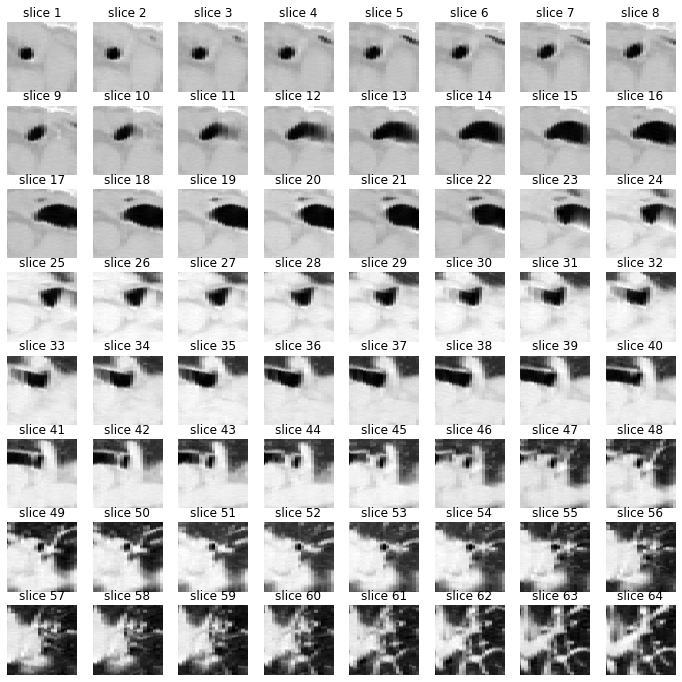

In [19]:
# Visualizing stack of images
imgs_to_process = np.load(check_img_path)
def sample_stack(stack, rows=8, cols=8, start_with=1, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[i],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

sample_stack(imgs_to_process)